# New Project Portfolio for CRISH

CRISH recently diversified its portfolio and introduced CRISHBet Gaming, a soon-leading online betting platform. It launched multiple digital marketing campaigns last month to boost user activity and drive deposits across different player segments. The team needs to evaluate the performance of various campaign types so far (e.g., VIP reloads, refer-a-friend, cash-back promos) across channels like sms, email, and social media.

As a data analyst on the team, you decided to help.

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
df = pd.read_csv("betting_campaign_performance.csv")
df.head()

,Campaign_ID,Campaign_Name,Channel,Target_Segment,Impressions,Clicks,Conversions,Deposits,Revenue_USD,Start_Date,End_Date
0,C007,Comeback Offer,Social Media,High Rollers,1631,565,565,565,18871.80,2025-06-03,2025-06-13
1,C020,VIP Reload,Push Notification,High Rollers,43298,1329,1329,1329,36295.42,2025-06-25,2025-07-07
2,C015,Bet & Chill,Email,Churned Users,30951,5490,4135,4135,1276.87,2025-06-23,2025-07-03
3,C011,Goal Galore,Affiliate,Casual Bettors,21720,9848,7311,6041,10421.06,2025-06-25,2025-07-02
4,C008,Spin & Win,SMS,New Users,48506,5781,5781,2566,25622.02,2025-06-08,2025-06-19


#### Exploration
- finding null values in columns

In [3]:
df['Campaign_ID'].isnull().sum()
df['Campaign_Name'].isnull().sum()
df['Channel'].isnull().sum()
df['Target_Segment'].isnull().sum()
df['Impressions'].isnull().sum()
df['Clicks'].isnull().sum()
df['Conversions'].isnull().sum()
df['Deposits'].isnull().sum()
df['Revenue_USD'].isnull().sum()
df['Start_Date'].isnull().sum()
df['End_Date'].isnull().sum()

np.int64(0)

In [4]:
# checking for unique values
df['Campaign_ID'].unique() #string dtype

array(['C007', 'C020', 'C015', 'C011', 'C008', 'C019', 'C004', 'C003',
       'C002', 'C012', 'C006', 'C001', 'C017', 'C010', 'C016', 'C005',
       'C009', 'C018', 'C014', 'C013'], dtype=object)

In [5]:
df['Campaign_Name'].unique() #category dtype

array(['Comeback Offer', 'VIP Reload', 'Bet & Chill', 'Goal Galore',
       'Spin & Win', 'Early Bird Bonus', 'Lucky Draw', 'Refer & Earn',
       'Weekend Frenzy', 'Welcome Bonus', 'Big Match Bonus',
       'High Roller Heaven', 'Flash Bet Boost', 'Midweek Madness',
       'Loyalty Bonus', 'Instant Win Promo', 'Mega Multiplier',
       'Deposit Doubler', 'Late Night Thrill', 'Cashback Carnival'],
      dtype=object)

In [6]:
df['Channel'].unique() #category

array(['Social Media', 'Push Notification', 'Email', 'Affiliate', 'SMS'],
      dtype=object)

In [7]:
df['Target_Segment'].unique() #category

array(['High Rollers', 'Churned Users', 'Casual Bettors', 'New Users',
       'Returning Users'], dtype=object)

In [8]:
df['Impressions'].unique() #int dtype

array([ 1631, 43298, 30951, ..., 14907, 21098, 19872])

In [9]:
df['Clicks'].unique()   #int dtype

array([ 565, 1329, 5490, ..., 9555, 6546, 9265])

In [10]:
df['Conversions'].unique()  #int dtype

array([ 565, 1329, 4135, ..., 6082, 4893, 7567])

In [11]:
df['Deposits'].unique()   #int dtype

array([ 565, 1329, 4135, ..., 5440, 5311, 6687])

In [12]:
df['Revenue_USD'].unique()   #float

array([18871.8 , 36295.42,  1276.87, ..., 11037.29, 46918.69, 31640.39])

In [13]:
df['Start_Date'].unique() #date

array(['2025-06-03', '2025-06-25', '2025-06-23', '2025-06-08',
       '2025-06-28', '2025-06-16', '2025-06-11', '2025-06-07',
       '2025-06-26', '2025-06-24', '2025-06-06', '2025-06-10',
       '2025-06-02', '2025-06-01', '2025-06-21', '2025-06-29',
       '2025-06-30', '2025-06-04', '2025-06-20', '2025-06-22',
       '2025-06-27', '2025-06-18', '2025-06-09', '2025-06-19',
       '2025-06-15', '2025-06-05', '2025-06-17', '2025-06-12',
       '2025-06-14', '2025-06-13'], dtype=object)

In [14]:
df['End_Date'].unique() #date

array(['2025-06-13', '2025-07-07', '2025-07-03', '2025-07-02',
       '2025-06-19', '2025-07-10', '2025-06-28', '2025-06-24',
       '2025-06-18', '2025-06-23', '2025-07-06', '2025-07-01',
       '2025-07-08', '2025-06-14', '2025-06-10', '2025-06-25',
       '2025-06-30', '2025-06-12', '2025-07-11', '2025-06-16',
       '2025-07-04', '2025-06-20', '2025-07-05', '2025-07-09',
       '2025-06-15', '2025-06-29', '2025-07-14', '2025-06-22',
       '2025-07-12', '2025-06-17', '2025-06-26', '2025-06-11',
       '2025-06-27', '2025-06-21', '2025-07-13', '2025-06-09',
       '2025-06-08'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Campaign_ID     30000 non-null  object 
 1   Campaign_Name   30000 non-null  object 
 2   Channel         30000 non-null  object 
 3   Target_Segment  30000 non-null  object 
 4   Impressions     30000 non-null  int64  
 5   Clicks          30000 non-null  int64  
 6   Conversions     30000 non-null  int64  
 7   Deposits        30000 non-null  int64  
 8   Revenue_USD     30000 non-null  float64
 9   Start_Date      30000 non-null  object 
 10  End_Date        30000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.5+ MB


In [16]:
df.shape

(30000, 11)

### Data Transformation
- change datatypes
- find KPIs
- find relationships

In [17]:
#change dtypes
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['End_Date'] = pd.to_datetime(df['End_Date'])

In [18]:
#find campaign duration
df['Duration'] = df['End_Date'] - df['Start_Date']

In [19]:
#preview df
df.head()

,Campaign_ID,Campaign_Name,Channel,Target_Segment,Impressions,Clicks,Conversions,Deposits,Revenue_USD,Start_Date,End_Date,Duration
0,C007,Comeback Offer,Social Media,High Rollers,1631,565,565,565,18871.80,2025-06-03,2025-06-13,10 days
1,C020,VIP Reload,Push Notification,High Rollers,43298,1329,1329,1329,36295.42,2025-06-25,2025-07-07,12 days
2,C015,Bet & Chill,Email,Churned Users,30951,5490,4135,4135,1276.87,2025-06-23,2025-07-03,10 days
3,C011,Goal Galore,Affiliate,Casual Bettors,21720,9848,7311,6041,10421.06,2025-06-25,2025-07-02,7 days
4,C008,Spin & Win,SMS,New Users,48506,5781,5781,2566,25622.02,2025-06-08,2025-06-19,11 days


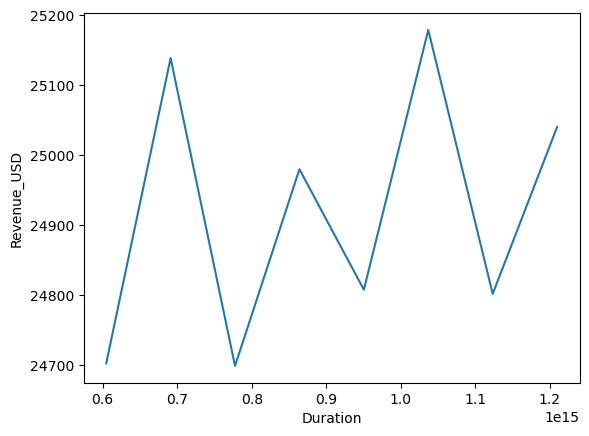

In [20]:
#relationship between duration and revenue
sns.lineplot(data=df, x='Duration', y='Revenue_USD', errorbar=None)
plt.show()

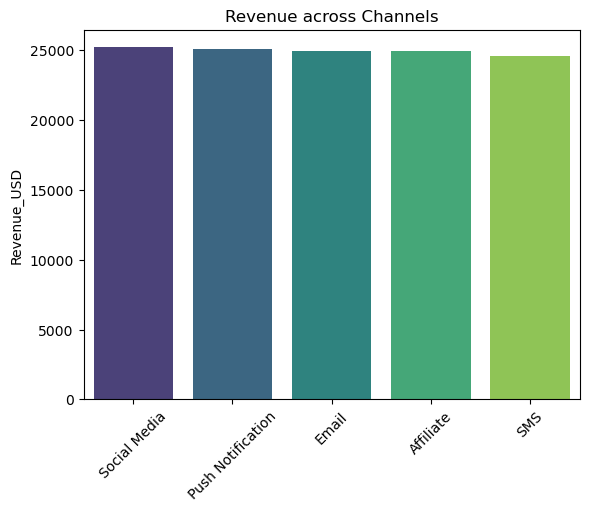

In [21]:
#relationship between channel and revenue
t = sns.barplot(data=df, x='Channel', y='Revenue_USD', errorbar=None, palette='viridis', legend=False)
t.set_title('Revenue across Channels')
plt.xticks(rotation=45)
plt.xlabel('')
plt.show()

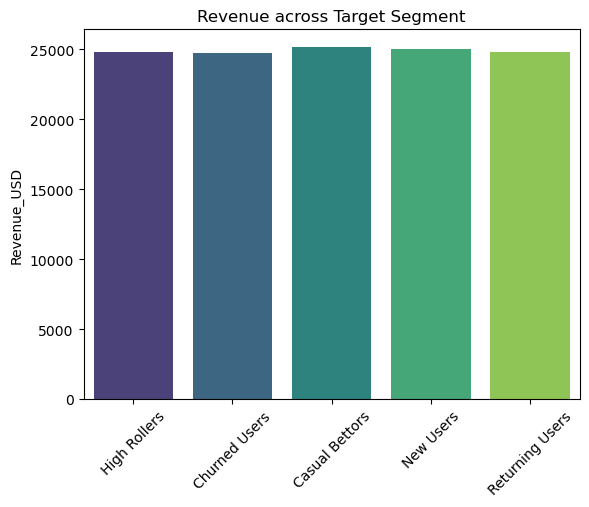

In [22]:
#relationship between channel and revenue
t = sns.barplot(data=df, x='Target_Segment', y='Revenue_USD', errorbar=None, palette='viridis', legend=False)
t.set_title('Revenue across Target Segment')
plt.xticks(rotation=45)
plt.xlabel('')
plt.show()

### KPIs

In [23]:
# checking the click through rate
df['CTR'] = df['Clicks']/df['Impressions']

#checking the conversion rate
df['CR'] = df['Conversions']/df['Clicks']

#checking deposit rate
df['DR'] = df['Deposits']/df['Conversions']

#checking revenue per deposit 
df['revenue_per_deposit'] = df['Revenue_USD']/df['Deposits']

In [24]:
df.head(3)

,Campaign_ID,Campaign_Name,Channel,Target_Segment,Impressions,Clicks,Conversions,Deposits,Revenue_USD,Start_Date,End_Date,Duration,CTR,CR,DR,revenue_per_deposit
0,C007,Comeback Offer,Social Media,High Rollers,1631,565,565,565,18871.80,2025-06-03,2025-06-13,10 days,0.346413,1.000000,1.0,33.401416
1,C020,VIP Reload,Push Notification,High Rollers,43298,1329,1329,1329,36295.42,2025-06-25,2025-07-07,12 days,0.030694,1.000000,1.0,27.310324
2,C015,Bet & Chill,Email,Churned Users,30951,5490,4135,4135,1276.87,2025-06-23,2025-07-03,10 days,0.177377,0.753188,1.0,0.308796


In [25]:
sort_channels = df['Channel'].value_counts().reset_index()
sort_channels

,Channel,count
0,Email,6028
1,Social Media,6026
2,SMS,6008
3,Affiliate,5989
4,Push Notification,5949


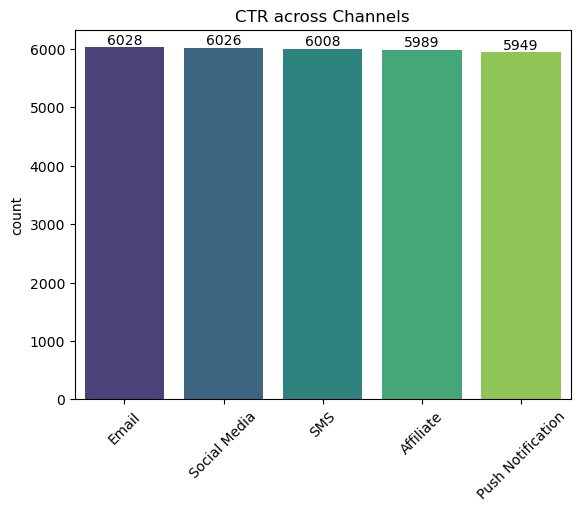

In [26]:
#checking counts of the channels
t = sns.barplot(data=sort_channels, x=sort_channels['Channel'], y=sort_channels['count'], errorbar=None, palette='viridis', legend=False)
t.set_title('CTR across Channels')

for container in t.containers:
    t.bar_label(container)

plt.xticks(rotation=45)
plt.xlabel('')
plt.show()

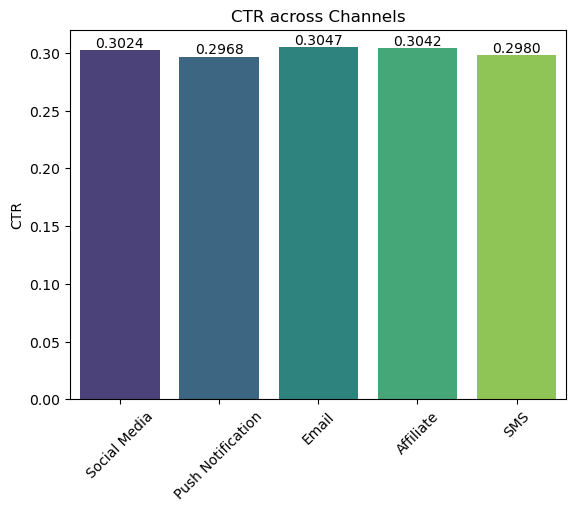

In [27]:
#relationship between CTR across Channels
t = sns.barplot(data=df, x='Channel', y='CTR', errorbar=None, palette='viridis', legend=False)
t.set_title('CTR across Channels')

for container in t.containers:
    t.bar_label(container, fmt='%.4f')

plt.xticks(rotation=45)
plt.xlabel('')
plt.show()

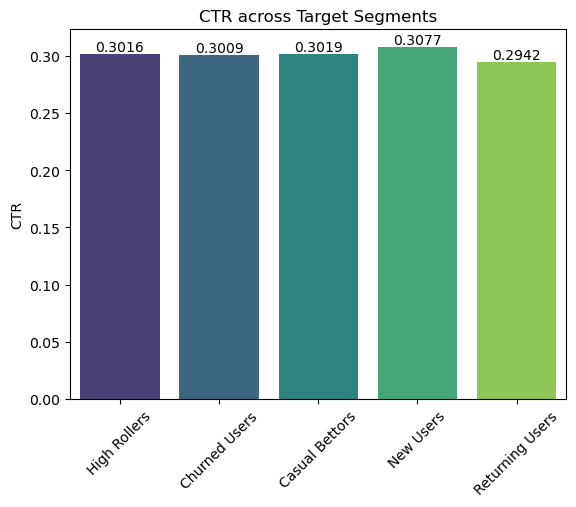

In [28]:
#relationship between CTR across Target Segment
t = sns.barplot(data=df, x='Target_Segment', y='CTR', errorbar=None, palette='viridis', legend=False)
t.set_title('CTR across Target Segments')

for container in t.containers:
    t.bar_label(container, fmt='%.4f')

plt.xticks(rotation=45)
plt.xlabel('')
plt.show()

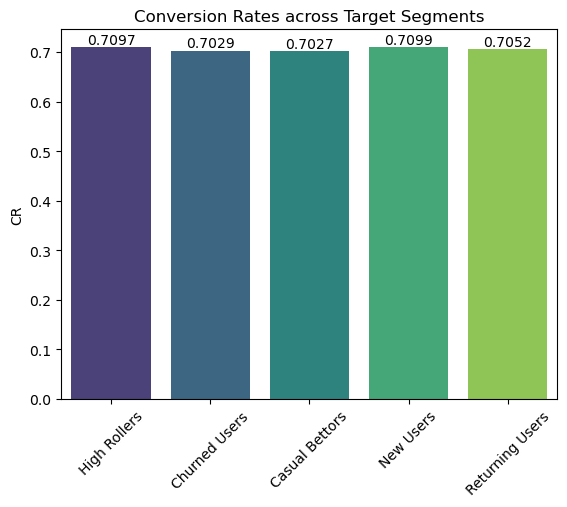

In [29]:
#relationship between CTR across Target Segment
t = sns.barplot(data=df, x='Target_Segment', y='CR', errorbar=None, palette='viridis', legend=False)
t.set_title('Conversion Rates across Target Segments')

for container in t.containers:
    t.bar_label(container, fmt='%.4f')

plt.xticks(rotation=45)
plt.xlabel('')
plt.show()

#### Displaying only KPIs

In [30]:
df_kpi = df[['Channel','CTR','CR','DR','revenue_per_deposit']]
df_kpi

,Channel,CTR,CR,DR,revenue_per_deposit
0,Social Media,0.346413,1.000000,1.000000,33.401416
1,Push Notification,0.030694,1.000000,1.000000,27.310324
2,Email,0.177377,0.753188,1.000000,0.308796
3,Affiliate,0.453407,0.742384,0.826289,1.725055
4,SMS,0.119181,1.000000,0.443868,9.985199
...,...,...,...,...,...
29995,Email,1.000000,1.000000,1.000000,48.554946
29996,Affiliate,0.291938,0.673174,0.817114,5.540638
29997,Social Media,0.055611,0.117008,1.000000,113.786495
29998,SMS,0.166461,1.000000,1.000000,13.359536


From our dataset, we can see that:
- revenue across different campaigns are relatively the same.
- new users, high rollers and returning users give us the best conversion rates so require more focus for customer retention.
- revenue is very high through channels when campaign duration is 7 days or 12 days long.
- Email is the most preferred, Affiliate next and Social Media came third as preferred channels.

### Part 2 - Campaign Effectiveness

- The marketing manager is particularly interested in what messaging style and time of day yield the highest conversions so shared additional data to aid with the analysis. The manager explained that this analysis is crucial for guiding future marketing strategies, ensuring that business messages reach potential customers when they're most likely to engage with their campaign hence must be addressed first.

- After exploring the dataset, it was noticed that the team grouped the channels into 2 different messaging styles ('Casual' versus 'Formal') and added times of day ('Morning' versus 'Evening') on conversion rates, which is a common scenario in marketing data analysis and the manager confirmed that too.
The team then shared the dataset in two parts. Kindly help them assess the marketing campaign effectiveness.

In [31]:
#load data
data = pd.read_feather("marketing_data.feather")
data.head(3)

,Messaging_Style,Time_of_Day,Click_Through_Rate,Conversions
0,Casual,Morning,0.640465,500
1,Formal,Evening,0.698533,598
2,Casual,Morning,0.257834,234


In [32]:
data.shape

(950, 4)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Messaging_Style     950 non-null    object 
 1   Time_of_Day         950 non-null    object 
 2   Click_Through_Rate  950 non-null    float64
 3   Conversions         950 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 29.8+ KB


In [34]:
#checking for nulls
data.isnull().sum()

Messaging_Style       0
Time_of_Day           0
Click_Through_Rate    0
Conversions           0
dtype: int64

In [35]:
#checking for duplicates
data.duplicated().sum()

np.int64(0)

In [36]:
#changing dtypes
data['Messaging_Style'] = data['Messaging_Style'].astype('category')
data['Time_of_Day'] = data['Time_of_Day'].astype('category')

In [37]:
#preview info to see changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Messaging_Style     950 non-null    category
 1   Time_of_Day         950 non-null    category
 2   Click_Through_Rate  950 non-null    float64 
 3   Conversions         950 non-null    int64   
dtypes: category(2), float64(1), int64(1)
memory usage: 17.1 KB


In [38]:
#summary
marketing_pivot = data.pivot_table(
  values='Conversions', 
  index='Messaging_Style', 
  columns='Time_of_Day', 
  aggfunc='mean')

# View the pivoted results
print(marketing_pivot)

Time_of_Day         Evening     Morning
Messaging_Style                        
Casual           402.329004  401.133891
Formal           432.913043  411.096000


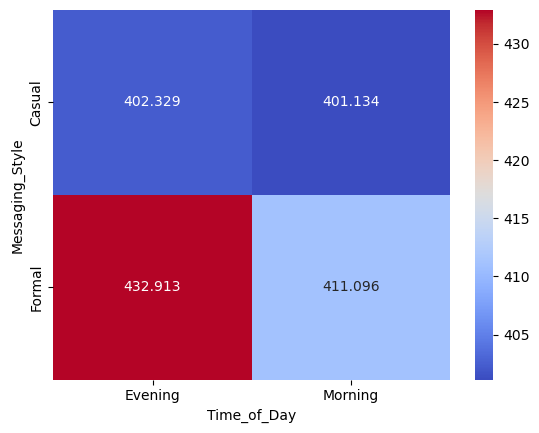

In [39]:
# Visualizing the interactions
sns.heatmap(marketing_pivot, 
         annot=True, 
         cmap='coolwarm',
         fmt='g')

plt.show()

Based on our findings, we can conclude that
- A combination of formal messaging style and evening time is highly preferrable.